# Imports

In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 

sys.path.insert(0, os.path.abspath(os.path.join("..", "src")))
from modeling import load_features, test_models
from exploration import read_and_split

# Preliminary modeling

We will test various models on our data in order to narrow it down to a few of the best ones, which we will later fine-tune. First we will load our preprocessed features. Implementation of load_features can be found in src/modeling.py. 

In [2]:
features = ['train_bow', 'train_tfidf', 'valid_bow', 'valid_tfidf']
features_paths = [f'../data/processed/features_{feat}.pkl' for feat in features]

features_train_bow, features_train_tfidf, features_valid_bow, features_valid_tfidf = load_features(features_paths)
_, y_train, _, y_valid, _, _ = read_and_split('../data/raw/tweets.csv')

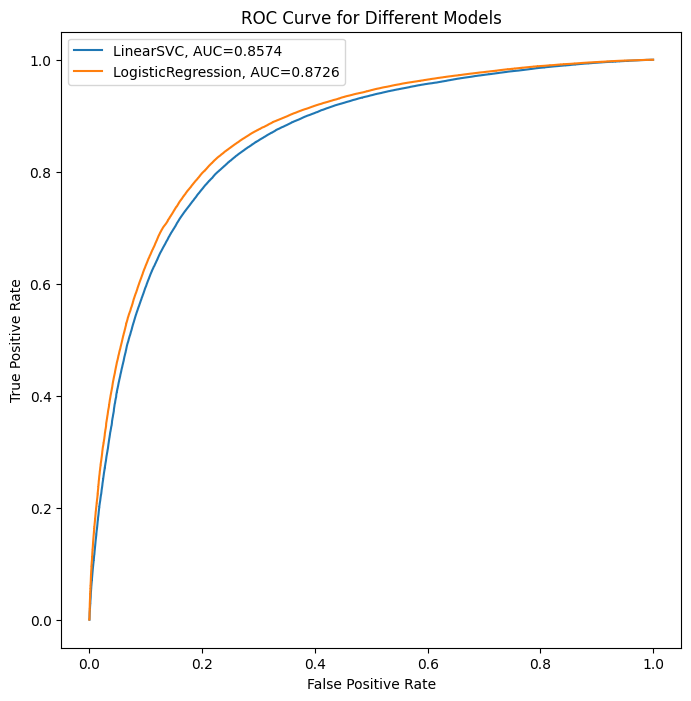

In [3]:
models = [LinearSVC(), LogisticRegression()]
performance = test_models(models, features_train_bow, y_train, features_valid_bow, y_valid)

In [4]:
performance

{'LinearSVC': {'Accuracy': 0.78609765625,
  'F1_score': np.float64(0.7886136492605589)},
 'LogisticRegression': {'Accuracy': 0.79919921875,
  'F1_score': np.float64(0.8016009324621091)}}